In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
sales = pd.read_csv('Highest Hollywood Grossing Movies.csv')
sales.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [4]:
sales['International Sales (in $)']

0      1132859475
1      1939128328
2      2086738578
3       647171407
4      1369544272
          ...    
913      36813370
914      22056304
915     124020006
916      26792250
917      89491916
Name: International Sales (in $), Length: 918, dtype: int64

In [5]:
award = pd.read_csv('the_oscar_award.csv')
award.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [6]:
print("Data type : ", type(sales))
print("Data dims : ", sales.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (918, 11)


In [7]:
print(sales.dtypes)

Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object


In [8]:
win = pd.DataFrame(award['winner'])   # Response
sale = pd.DataFrame(sales['International Sales (in $)'])       # Predictor

In [9]:
# Train Set : 600 samples
sale_train = pd.DataFrame(sale[:600])
win_train = pd.DataFrame(win[:600])

# Test Set : 200 samples
sale_test = pd.DataFrame(sale[-200:])
win_test = pd.DataFrame(win[-200:])

# Check the sample sizes
print("Train Set :", win_train.shape, sale_train.shape)
print("Test Set  :", win_test.shape, sale_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [10]:
type(win_train["winner"])

pandas.core.series.Series

In [11]:
# Summary Statistics for Winner Train
win_train["winner"].value_counts()

False    459
True     141
Name: winner, dtype: int64

In [12]:
# Summary Statistics for Run Train
sale_train.describe()

,International Sales (in $)
count,6.000000e+02
mean,2.940422e+08
std,2.406439e+08
min,1.506700e+04
25%,1.349525e+08
50%,2.228082e+08
75%,3.960245e+08
max,2.086739e+09


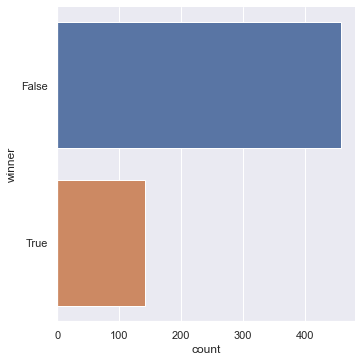

In [13]:
# Count Plot for Winner Train
sb.catplot(y = "winner", data = win_train, kind = "count")

<AxesSubplot:>

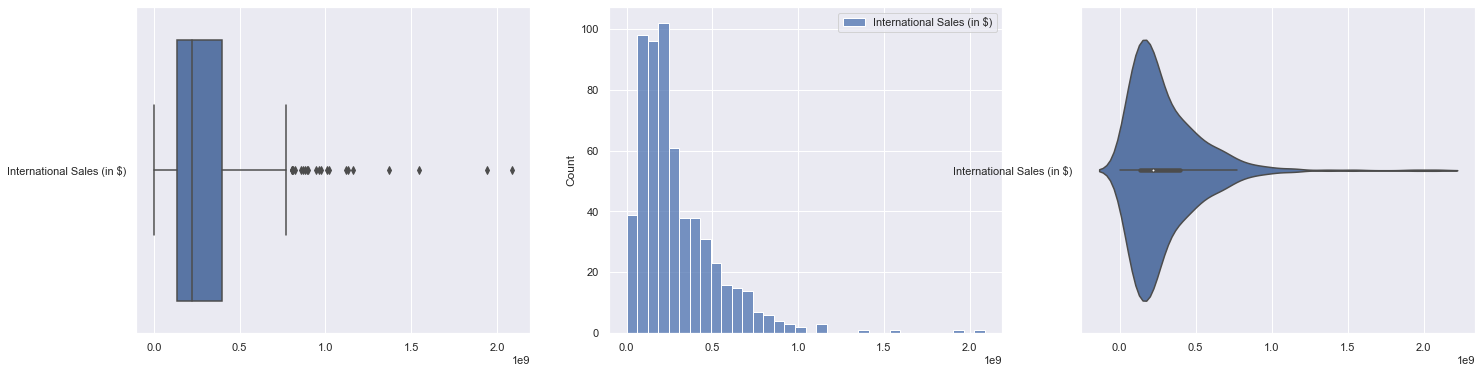

In [14]:
# Plot the distributions of Sale Train
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = sale_train, orient = "h", ax = axes[0])
sb.histplot(data = sale_train, ax = axes[1])
sb.violinplot(data = sale_train, orient = "h", ax = axes[2])

<AxesSubplot:xlabel='International Sales (in $)', ylabel='winner'>

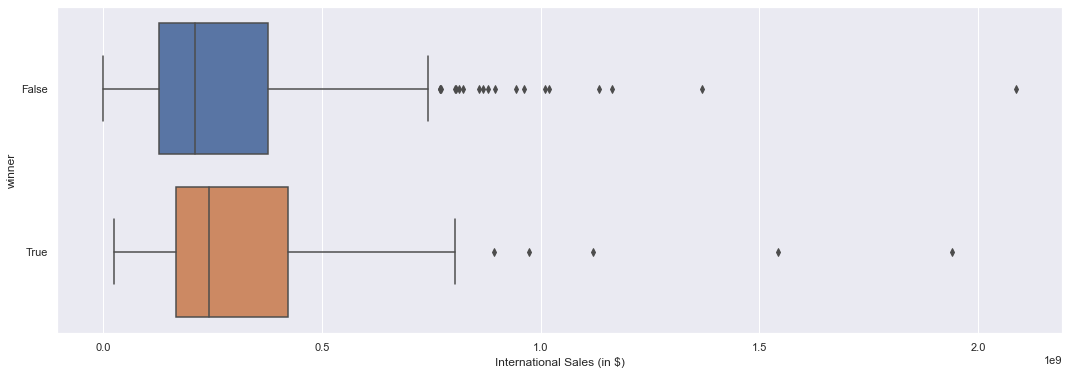

In [15]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([sale_train, win_train], axis = 1).reindex(sale_train.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "International Sales (in $)", y = "winner", data = trainDF, orient = "h")

<AxesSubplot:xlabel='International Sales (in $)', ylabel='winner'>

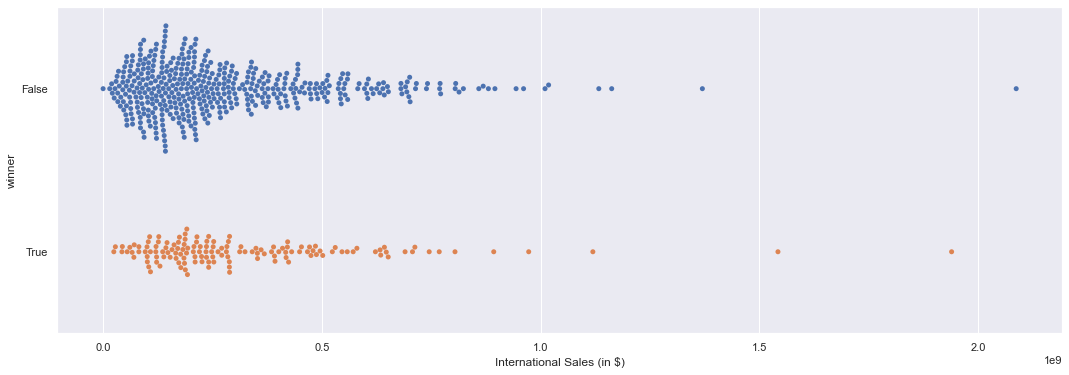

In [16]:
# Create a joint dataframe by concatenating Total and Legendary
trainDF = pd.concat([sale_train, win_train], axis = 1).reindex(sale_train.index)

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.swarmplot(x = "International Sales (in $)", y = "winner", data = trainDF, orient = "h")

In [17]:
sale.head()

,International Sales (in $)
0,1132859475
1,1939128328
2,2086738578
3,647171407
4,1369544272


In [18]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [19]:
# Train the Decision Tree Classifier model
dectree.fit(sale_train, win_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["International Sales (in $)"], 
          class_names=["Lose","Win"])

In [ ]:
# Predict Legendary corresponding to Total Train
win_train_pred = dectree.predict(sale_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sale_train, win_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(sale_train, win_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
# Predict Legendary corresponding to Total Test
win_test_pred = dectree.predict(sale_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(sale_test, win_test))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(win_test, win_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
win = pd.DataFrame(award['winner'])   # Response
sale = pd.DataFrame(sales['International Sales (in $)'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(sale, win, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(334.8, 543.6, 'International Sales (in $) <= 96286464.0\ngini = 0.36\nsamples = 600\nvalue = [459, 141]\nclass = Lose'),
 Text(167.4, 326.16, 'International Sales (in $) <= 82618384.0\ngini = 0.219\nsamples = 88\nvalue = [77, 11]\nclass = Lose'),
 Text(83.7, 108.72000000000003, 'gini = 0.281\nsamples = 65\nvalue = [54, 11]\nclass = Lose'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = Lose'),
 Text(502.20000000000005, 326.16, 'International Sales (in $) <= 101509500.0\ngini = 0.379\nsamples = 512\nvalue = [382, 130]\nclass = Lose'),
 Text(418.5, 108.72000000000003, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Win'),
 Text(585.9, 108.72000000000003, 'gini = 0.374\nsamples = 506\nvalue = [380, 126]\nclass = Lose')]

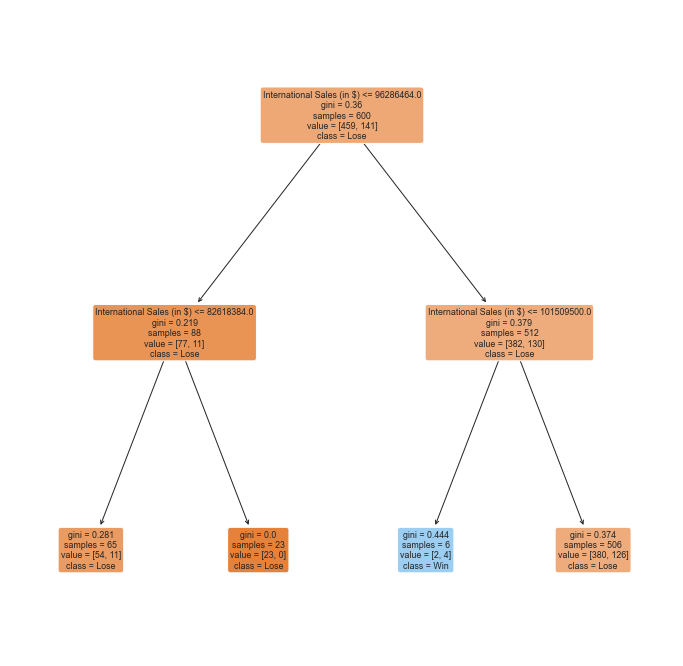

In [21]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["International Sales (in $)"], 
          class_names=["Lose","Win"])

In [24]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["International Sales (in $)"]

y = pd.DataFrame(award['winner'])
X = pd.DataFrame(sales[predictors]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

ValueError: Found input variables with inconsistent numbers of samples: [918, 10395]

KeyError: "None of [Int64Index([1132859475, 1939128328, 2086738578,  647171407, 1369544272,\n             868642706, 1542283320, 1018130819,  895457605,  712517448,\n            ...\n              49834813,   33862530,   78649005,  101000000,   71000000,\n              36813370,   22056304,  124020006,   26792250,   89491916],\n           dtype='int64', length=918)] are in the [columns]"